In [3]:
from google.colab import drive, userdata
import os

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Setup Paths (Change to your actual repo name)
REPO_PATH = "/content/drive/MyDrive/ML/DL_With_Pytorch"
%cd {REPO_PATH}

# 3. Secure Auth
token = userdata.get('GH_TOKEN')
username = "barada02"
repo = "DL_With_Pytorch"
!git remote set-url origin https://{token}@github.com/{username}/{repo}.git

# 4. Identity
!git config --global user.email "Chandanbarada2@gmail.com"
!git config --global user.name "Kumar"

!git pull origin main
print("✅ Environment Ready!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML/DL_With_Pytorch
From https://github.com/barada02/DL_With_Pytorch
 * branch            main       -> FETCH_HEAD
Already up to date.
✅ Environment Ready!


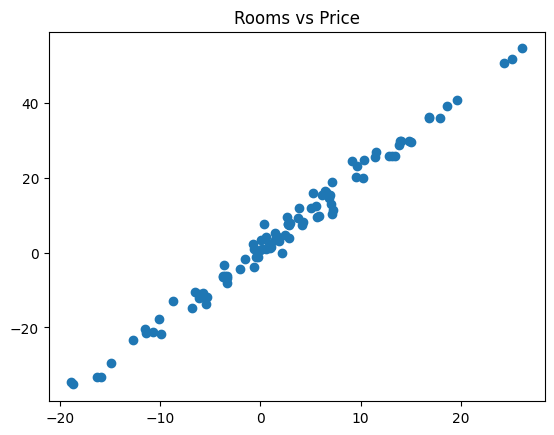

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Simple data: y = 2x + 1
X = torch.randn(100, 1) * 10
y = 2 * X + 1 + torch.randn(100, 1) * 2  # Added some noise

plt.scatter(X, y)
plt.title("Rooms vs Price")
plt.show()

In [5]:
import torch.nn as nn

# 1. Create Model
model = nn.Linear(in_features=1, out_features=1)

# 2. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 3. Training Loop
epochs = 100
for epoch in range(epochs):
    inputs, targets = X, y

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("✅ Training Complete!")

Epoch [20/100], Loss: 5.9643
Epoch [40/100], Loss: 5.7360
Epoch [60/100], Loss: 5.6315
Epoch [80/100], Loss: 5.5346
Epoch [100/100], Loss: 5.4447
✅ Training Complete!


In [6]:
# 1. Save the model weights (This stays on your Drive, ignored by Git if you have .gitignore)
torch.save(model.state_dict(), 'simple_linear_model.pth')

